In [1]:
import pickle
from rbbm_src.labelling_func_src.src.LFRepair import fix_rules_with_solver_input,populate_violations
from rbbm_src.labelling_func_src.src.TreeRules import PredicateNode
import pydot
from IPython.display import Image, display
from collections import deque

[nltk_data] Downloading package words to /home/opc/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to /home/opc/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
2024-10-10 22:07:44.979244: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-10 22:07:45.059290: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-10 22:07:45.060762: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
DEBUG 2024-10-10 22:07:46,148 [tpu_cluster_resolver.py:<module>:32] Falling back to TensorFlow client; we recommended you install the Cloud TPU client directly with pip install c

In [2]:
# we first populate the tree rules with user input
# then we create a ranking of userinputs in terms of the number of 
# "unfulfilled" conditions (that is fall to the left branch and got abstain)
# but are supposed to get non abstain labels

with open('test_input_fix_exhaustively.pkl', 'rb') as f:
    input_dict = pickle.load(f)

In [3]:
len(input_dict)

15

In [4]:
for i in input_dict:
    input_dict[i]['user_input']['id'] = input_dict[i]['user_input'].reset_index().index

In [5]:
leaf_nodes = []

In [6]:
list(input_dict)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [7]:
input_dict[0]['user_input'].head(1)

,old_text,expected_label,fold,cid,text,lf_labeled,model_pred_diff,model_pred_prob_tuple,model_pred,vectors,id
0,meh does not come with power adapter and the wire is shoddy i works but you would be better off looking elsewhere for a usb hub,1,0.0,150508,meh does not come with power adapter and the wire is shoddy i works but you would be better off looking elsewhere for a usb hub,-1,0.760576,"(0.11971220903284246, 0.8802877909671576)",1,"-1,-1,-1,-1,-1,-1,1,-1,0,-1,-1,1,-1,-1,-1",0


In [8]:
# for i, c in input_dict[0]['user_input'].head(1).iterrows():
#     node_populated = populate_violations(input_dict[0]['rule'], c)

In [9]:
for rid in input_dict:
    rids = set([])
    crule = input_dict[rid]['rule']
    cinputs = input_dict[rid]['user_input']
    for i, c in cinputs.iterrows():
        leaf_node_with_complaints = populate_violations(crule, c)
        if(leaf_node_with_complaints.number not in rids):
            rids.add(leaf_node_with_complaints.number)
            leaf_nodes.append(leaf_node_with_complaints)
#     leaf_nodes.extend(c_leaf_nodes)

In [10]:
# for i, c in input_dict[0]['user_input'].head(1).iterrows():
#     print(c)
#     nodes = populate_violations(input_dict[0]['rule'], c)

In [11]:
len(leaf_nodes)

34

In [12]:
import pydot
from IPython.display import Image, display

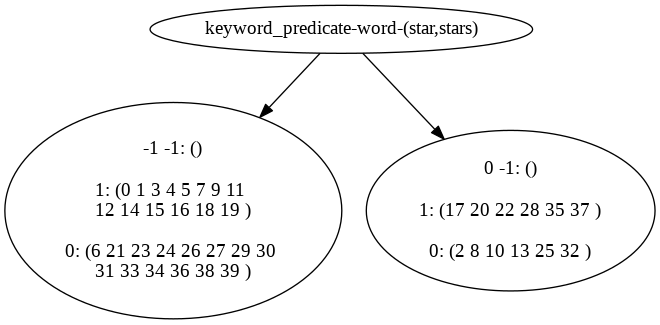

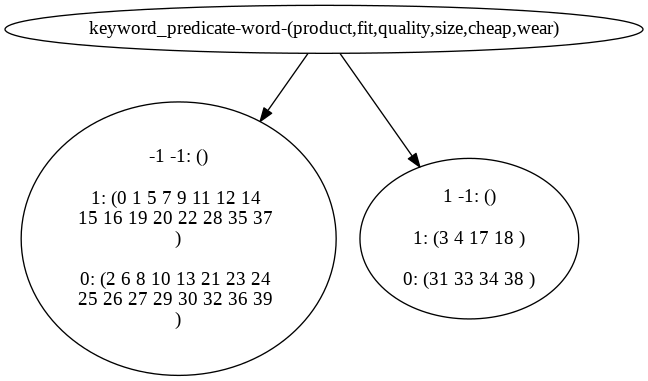

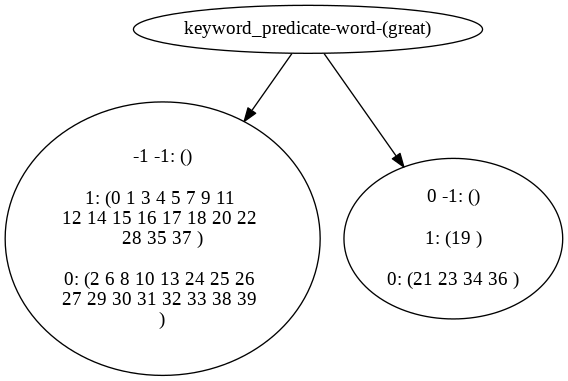

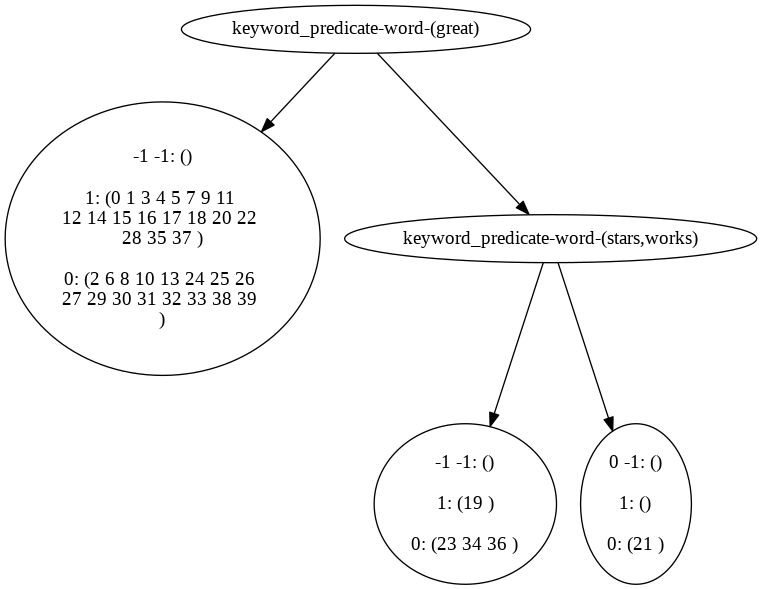

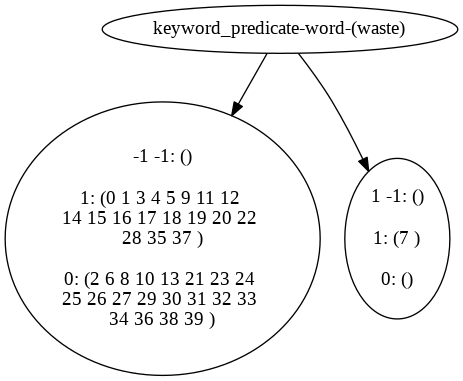

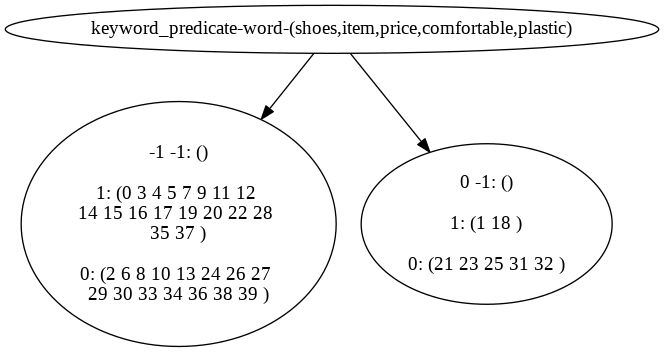

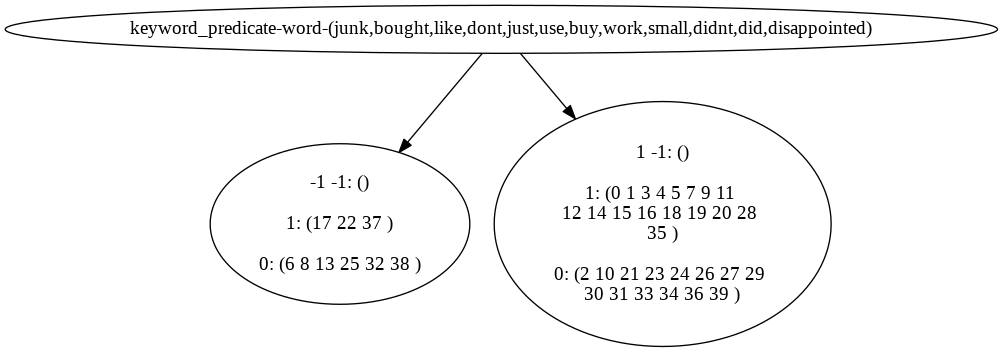

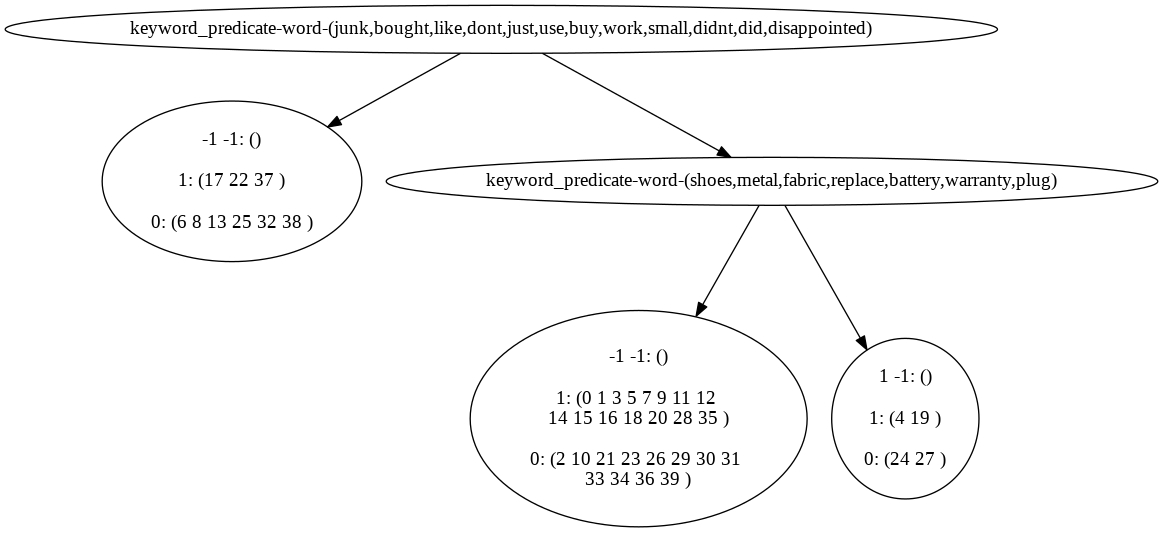

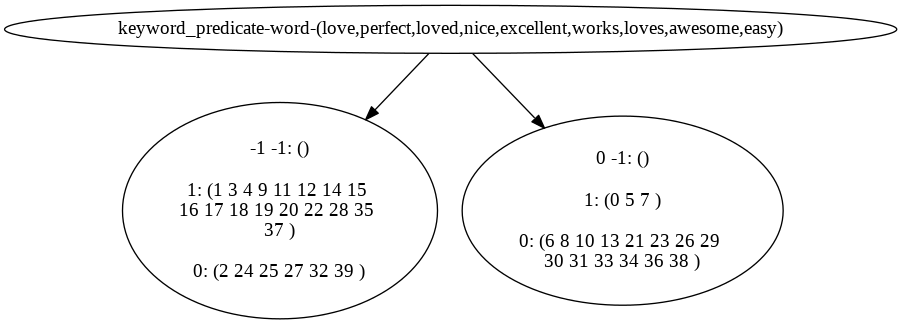

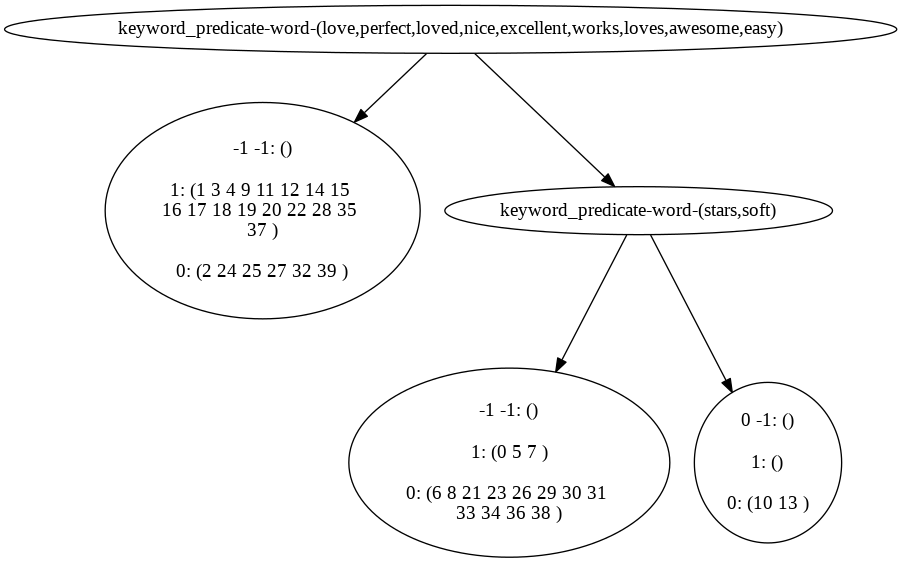

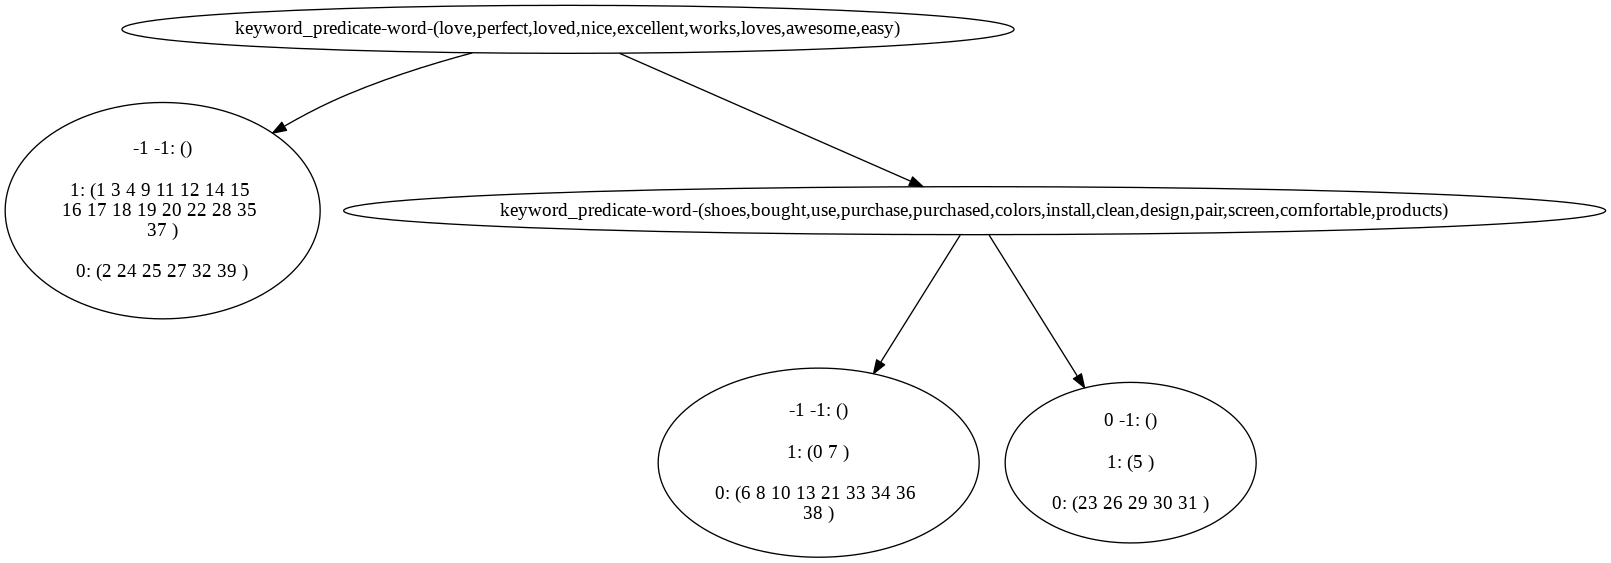

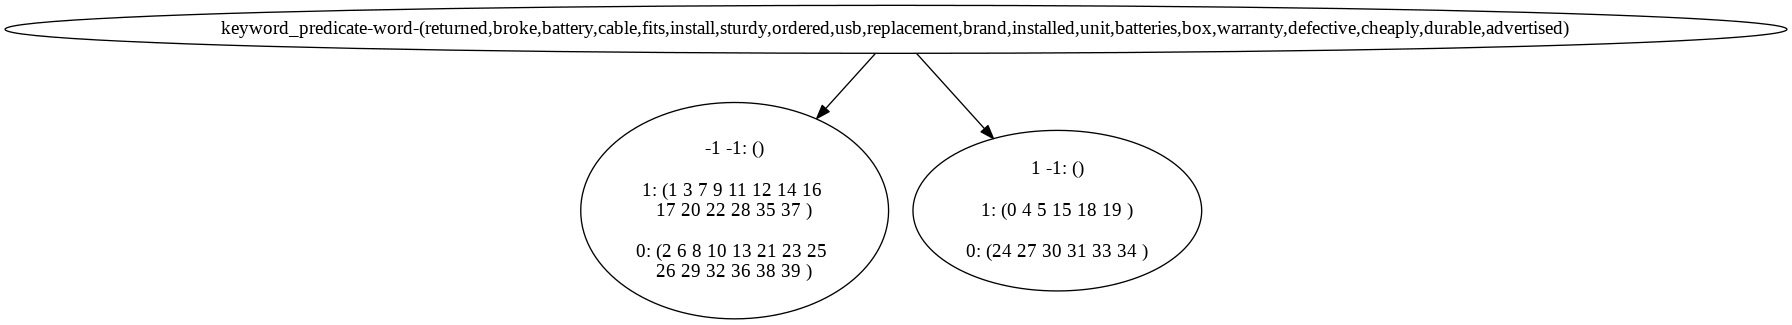

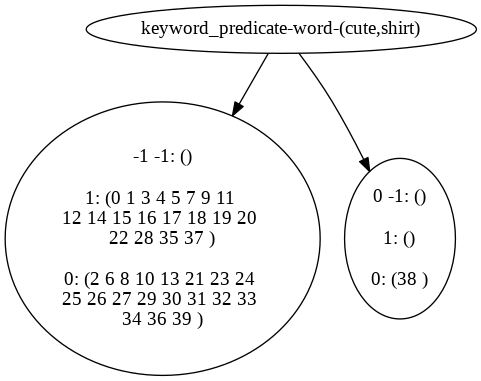

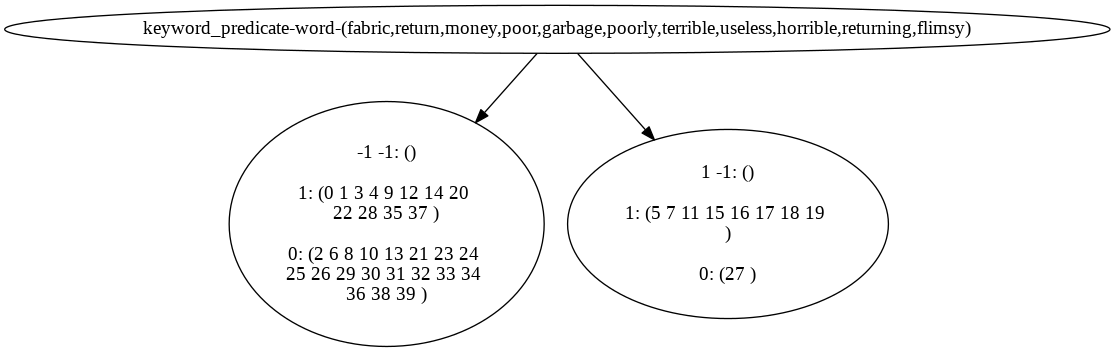

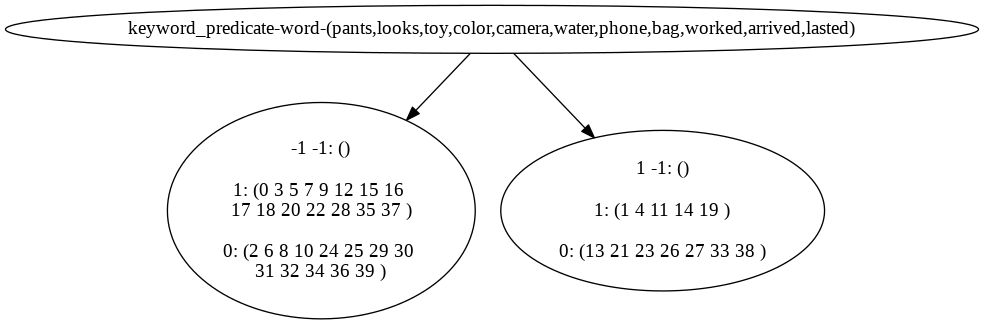

In [13]:
for rid in input_dict:
    dot_string=input_dict[rid]['rule'].gen_dot_string('')
    graph = pydot.graph_from_dot_data(dot_string)[0]
    plt = Image(graph.create_png())
    display(plt)

In [14]:
input_dict[0]['user_input']

,old_text,expected_label,fold,cid,text,lf_labeled,model_pred_diff,model_pred_prob_tuple,model_pred,vectors,id
0,meh does not come with power adapter and the wire is shoddy i works but you would be better off looking elsewhere for a usb hub,1,0.0,150508,meh does not come with power adapter and the wire is shoddy i works but you would be better off looking elsewhere for a usb hub,-1,0.760576,"(0.11971220903284246, 0.8802877909671576)",1,"-1,-1,-1,-1,-1,-1,1,-1,0,-1,-1,1,-1,-1,-1",0
1,refund please the item xlarge and it looks like 4x so i need a refund to large i would like a refund asap,1,0.0,160346,refund please the item xlarge and it looks like 4x so i need a refund to large i would like a refund asap,-1,0.920187,"(0.039906332540174734, 0.9600936674598252)",1,"-1,-1,-1,-1,-1,0,1,-1,-1,-1,-1,-1,-1,-1,1",1
3,hooked right from the start all set to get married how is it possible to wake up in a strangers bed and how is it that this stranger makes the bride to be feel more alive than anyone ever has just what and who is it that this bride really wants a funny witty charming story that had me hooked right from the start,0,0.0,6018,hooked right from the start all set to get married how is it possible to wake up in a strangers bed and how is it that this stranger makes the bride to be feel more alive than anyone ever has just what and who is it that this bride really wants a funny witty charming story that had me hooked right from the start,-1,0.198978,"(0.5994891817417697, 0.4005108182582303)",0,"0,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1",2
5,california prop 65 warning buying a product with a prop 65 warning is an absolutely unneeded risk the very fact that they put the warning label on means that they acknowledge that the cadmium levels of this powder exceed ca safe limits that is also why they likely place a recommendation on the label of 1 serving a day because they know even at 1 serving they are over the threshold avoid this product,1,0.0,155386,california prop 65 warning buying a product with a prop 65 warning is an absolutely unneeded risk the very fact that they put the warning label on means that they acknowledge that the cadmium levels of this powder exceed ca safe limits that is also why they likely place a recommendation on the label of 1 serving a day because they know even at 1 serving they are over the threshold avoid this product,-1,0.701975,"(0.14901237239774964, 0.8509876276022504)",1,"-1,1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1",3
6,this battery does not fit the kaito ka600 radio as specified this battery is supposed to fit the kaito ka 600 radio it does not fit in that radio nor will it connect to it in any way the correct battery looks like an oversized aa battery but in 36 volt,1,0.0,153898,this battery does not fit the kaito ka600 radio as specified this battery is supposed to fit the kaito ka 600 radio it does not fit in that radio nor will it connect to it in any way the correct battery looks like an oversized aa battery but in 36 volt,-1,0.999999,"(5.742901141096579e-07, 0.9999994257098859)",1,"-1,1,-1,-1,-1,-1,1,1,-1,-1,-1,1,-1,-1,1",4
9,mine is defective i lost the box so i cant return it but this thing is the worst filter ive ever used sorry culligan i loved their under the sink filter but this one must be defective because it takes a over 20 minutes to fill up the first round in the reservoir,1,0.0,145923,mine is defective i lost the box so i cant return it but this thing is the worst filter ive ever used sorry culligan i loved their under the sink filter but this one must be defective because it takes a over 20 minutes to fill up the first round in the reservoir,-1,0.985816,"(0.007092149397308912, 0.9929078506026912)",1,"-1,-1,-1,-1,-1,-1,1,-1,0,-1,0,1,-1,1,-1",5
10,has a special place in my heart forever in love with this story these characters and this world,0,0.0,19930,has a special place in my heart forever in love with this story these characters and this world,-1,0.134319,"(0.5671596248774151, 0.

In [15]:
from rbbm_src.labelling_func_src.src.TreeRules import (
	SPAM,
	HAM,
	ABSTAIN,
)

In [16]:
from collections import defaultdict

In [17]:
uinput_unsatisfied_counts = defaultdict(int)

In [18]:
for ln in leaf_nodes:
    if(ln.label==ABSTAIN):
        for l in [SPAM, HAM]:
            for u in ln.pairs[l]:
                uinput_unsatisfied_counts[u['cid']]+=1

In [19]:
len(uinput_unsatisfied_counts)

40

In [20]:
uinput_unsatisfied_counts

defaultdict(int,
            {150508: 12,
             160346: 12,
             155386: 13,
             153898: 10,
             145923: 10,
             126139: 11,
             117524: 14,
             163088: 12,
             169728: 14,
             143770: 13,
             145839: 12,
             112950: 13,
             112416: 10,
             116676: 9,
             19930: 14,
             78168: 9,
             83858: 9,
             51801: 12,
             2715: 11,
             98976: 10,
             44573: 12,
             35953: 11,
             47814: 9,
             55714: 10,
             33723: 10,
             42003: 12,
             55663: 11,
             96559: 14,
             178446: 13,
             93288: 14,
             121469: 13,
             132175: 13,
             93211: 14,
             6018: 13,
             62230: 13,
             49932: 11,
             16804: 11,
             10700: 13,
             85658: 13,
             71954: 12})

In [21]:
from rbbm_src.labelling_func_src.src.KeyWordRuleMiner import KeyWordRuleMiner 

In [22]:
df_input = input_dict[0]['user_input']

In [23]:
sorted_textids = sorted(uinput_unsatisfied_counts, key=uinput_unsatisfied_counts.get, reverse=True)

# Use `.loc[]` to reorder the DataFrame based on the sorted textids without modifying the original DataFrame
sorted_df = df_input.set_index('cid').loc[sorted_textids].reset_index()

print("Original DataFrame:")
display(df_input)

print("\nDataFrame Sorted by Dictionary Values (High to Low):")
display(sorted_df)

Original DataFrame:


,old_text,expected_label,fold,cid,text,lf_labeled,model_pred_diff,model_pred_prob_tuple,model_pred,vectors,id
0,meh does not come with power adapter and the wire is shoddy i works but you would be better off looking elsewhere for a usb hub,1,0.0,150508,meh does not come with power adapter and the wire is shoddy i works but you would be better off looking elsewhere for a usb hub,-1,0.760576,"(0.11971220903284246, 0.8802877909671576)",1,"-1,-1,-1,-1,-1,-1,1,-1,0,-1,-1,1,-1,-1,-1",0
1,refund please the item xlarge and it looks like 4x so i need a refund to large i would like a refund asap,1,0.0,160346,refund please the item xlarge and it looks like 4x so i need a refund to large i would like a refund asap,-1,0.920187,"(0.039906332540174734, 0.9600936674598252)",1,"-1,-1,-1,-1,-1,0,1,-1,-1,-1,-1,-1,-1,-1,1",1
3,hooked right from the start all set to get married how is it possible to wake up in a strangers bed and how is it that this stranger makes the bride to be feel more alive than anyone ever has just what and who is it that this bride really wants a funny witty charming story that had me hooked right from the start,0,0.0,6018,hooked right from the start all set to get married how is it possible to wake up in a strangers bed and how is it that this stranger makes the bride to be feel more alive than anyone ever has just what and who is it that this bride really wants a funny witty charming story that had me hooked right from the start,-1,0.198978,"(0.5994891817417697, 0.4005108182582303)",0,"0,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1",2
5,california prop 65 warning buying a product with a prop 65 warning is an absolutely unneeded risk the very fact that they put the warning label on means that they acknowledge that the cadmium levels of this powder exceed ca safe limits that is also why they likely place a recommendation on the label of 1 serving a day because they know even at 1 serving they are over the threshold avoid this product,1,0.0,155386,california prop 65 warning buying a product with a prop 65 warning is an absolutely unneeded risk the very fact that they put the warning label on means that they acknowledge that the cadmium levels of this powder exceed ca safe limits that is also why they likely place a recommendation on the label of 1 serving a day because they know even at 1 serving they are over the threshold avoid this product,-1,0.701975,"(0.14901237239774964, 0.8509876276022504)",1,"-1,1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1",3
6,this battery does not fit the kaito ka600 radio as specified this battery is supposed to fit the kaito ka 600 radio it does not fit in that radio nor will it connect to it in any way the correct battery looks like an oversized aa battery but in 36 volt,1,0.0,153898,this battery does not fit the kaito ka600 radio as specified this battery is supposed to fit the kaito ka 600 radio it does not fit in that radio nor will it connect to it in any way the correct battery looks like an oversized aa battery but in 36 volt,-1,0.999999,"(5.742901141096579e-07, 0.9999994257098859)",1,"-1,1,-1,-1,-1,-1,1,1,-1,-1,-1,1,-1,-1,1",4
9,mine is defective i lost the box so i cant return it but this thing is the worst filter ive ever used sorry culligan i loved their under the sink filter but this one must be defective because it takes a over 20 minutes to fill up the first round in the reservoir,1,0.0,145923,mine is defective i lost the box so i cant return it but this thing is the worst filter ive ever used sorry culligan i loved their under the sink filter but this one must be defective because it takes a over 20 minutes to fill up the first round in the reservoir,-1,0.985816,"(0.007092149397308912, 0.9929078506026912)",1,"-1,-1,-1,-1,-1,-1,1,-1,0,-1,0,1,-1,1,-1",5
10,has a special place in my heart forever in love with this story these characters and this world,0,0.0,19930,has a special place in my heart forever in love with this story these characters and this world,-1,0.134319,"(0.5671596248774151, 0.


DataFrame Sorted by Dictionary Values (High to Low):


,cid,old_text,expected_label,fold,text,lf_labeled,model_pred_diff,model_pred_prob_tuple,model_pred,vectors,id
0,117524,if you are a bed wetter maybe it would be if you are a bed wetter maybe it would be ok dont do rubber sheets,1,0.0,if you are a bed wetter maybe it would be if you are a bed wetter maybe it would be ok dont do rubber sheets,-1,0.346848,"(0.3265761919141184, 0.6734238080858815)",1,"-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1",9
1,169728,stayed compressed foam did not uncompress in most areas of the pad after several days laying flat open,1,0.0,stayed compressed foam did not uncompress in most areas of the pad after several days laying flat open,-1,0.346848,"(0.3265761919141184, 0.6734238080858815)",1,"-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1",12
2,19930,has a special place in my heart forever in love with this story these characters and this world,0,0.0,has a special place in my heart forever in love with this story these characters and this world,-1,0.134319,"(0.5671596248774151, 0.4328403751225849)",0,"-1,-1,-1,-1,-1,-1,-1,-1,0,-1,-1,-1,-1,-1,-1",6
3,96559,really did a good job on my patio really did a good job on my patio takes patience and a big patio still takes time but this results in a very even cleaning in much less time,0,0.0,really did a good job on my patio really did a good job on my patio takes patience and a big patio still takes time but this results in a very even cleaning in much less time,-1,0.346848,"(0.3265761919141184, 0.6734238080858815)",1,"-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1",39
4,93288,one star never said it was button closure instead of zipper i would excite for zipper,1,0.0,one star never said it was button closure instead of zipper i would excite for zipper,-1,0.510588,"(0.7552938416777737, 0.24470615832222636)",0,"0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1",22
5,93211,one star to big,1,0.0,one star to big,-1,0.510588,"(0.7552938416777737, 0.24470615832222636)",0,"0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1",37
6,155386,california prop 65 warning buying a product with a prop 65 warning is an absolutely unneeded risk the very fact that they put the warning label on means that they acknowledge that the cadmium levels of this powder exceed ca safe limits that is also why they likely place a recommendation on the label of 1 serving a day because they know even at 1 serving they are over the threshold avoid this product,1,0.0,california prop 65 warning buying a product with a prop 65 warning is an absolutely unneeded risk the very fact that they put the warning label on means that they acknowledge that the cadmium levels of this powder exceed ca safe limits that is also why they likely place a recommendation on the label of 1 serving a day because they know even at 1 serving they are over the threshold avoid this product,-1,0.701975,"(0.14901237239774964, 0.8509876276022504)",1,"-1,1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1",3
7,143770,unevenly cooked rock hard rice after 1 year dont buy this if you want it long term ive had this rice cooker for a year and it has always caused problems as a vegetable steamer i always have to do two rounds of steaming to get the vegetables soft so that means letting it steam and then when its finished redoing it again every time as a rice cooker it is very lacking ive grown up my whole life with korean rice cookers and this rice cooker is nothing like theirs this one always makes the rice at the bottom stick and get rock hard i dont add oil butter salt to my rice and korean rice cookers are non stick and work much better without having to add those extra things to it not only is the rice rock hard at the bottom but you can only make same day rice korean rice cookers can let you keep the rice in the cooker for multiple days if you leave rice in this one even overnight the rice browns and gets hard and watery if you want to make more than a few cups of rice the rice does not cook evenly half of my rice is watery and the other half is cooked that do

In [24]:
used_keywords = []

In [25]:
for rid in input_dict:
    rids = set([])
    crule = input_dict[rid]['rule']
    cinputs = input_dict[rid]['user_input']
    
    queue = deque([crule.root])
    while(queue):
        cur_node = queue.popleft()
        if(isinstance(cur_node, PredicateNode)):
            used_keywords.extend(cur_node.pred.keywords)
        if(cur_node.left):
            queue.append(cur_node.left)
        if(cur_node.right):
            queue.append(cur_node.right)
            
    for i, c in cinputs.iterrows():
        leaf_node_with_complaints = populate_violations(crule, c)
        if(leaf_node_with_complaints.number not in rids):
            rids.add(leaf_node_with_complaints.number)
            leaf_nodes.append(leaf_node_with_complaints)

In [26]:
used_keywords

['star',
 'stars',
 'product',
 'fit',
 'quality',
 'size',
 'cheap',
 'wear',
 'great',
 'great',
 'stars',
 'works',
 'waste',
 'shoes',
 'item',
 'price',
 'comfortable',
 'plastic',
 'junk',
 'bought',
 'like',
 'dont',
 'just',
 'use',
 'buy',
 'work',
 'small',
 'didnt',
 'did',
 'disappointed',
 'junk',
 'bought',
 'like',
 'dont',
 'just',
 'use',
 'buy',
 'work',
 'small',
 'didnt',
 'did',
 'disappointed',
 'shoes',
 'metal',
 'fabric',
 'replace',
 'battery',
 'warranty',
 'plug',
 'love',
 'perfect',
 'loved',
 'nice',
 'excellent',
 'works',
 'loves',
 'awesome',
 'easy',
 'love',
 'perfect',
 'loved',
 'nice',
 'excellent',
 'works',
 'loves',
 'awesome',
 'easy',
 'stars',
 'soft',
 'love',
 'perfect',
 'loved',
 'nice',
 'excellent',
 'works',
 'loves',
 'awesome',
 'easy',
 'shoes',
 'bought',
 'use',
 'purchase',
 'purchased',
 'colors',
 'install',
 'clean',
 'design',
 'pair',
 'screen',
 'comfortable',
 'products',
 'returned',
 'broke',
 'battery',
 'cable',
 'fit

In [27]:
used_keyword_set = set(used_keywords)

In [28]:
used_keyword_set

{'advertised',
 'arrived',
 'awesome',
 'bag',
 'batteries',
 'battery',
 'bought',
 'box',
 'brand',
 'broke',
 'buy',
 'cable',
 'camera',
 'cheap',
 'cheaply',
 'clean',
 'color',
 'colors',
 'comfortable',
 'cute',
 'defective',
 'design',
 'did',
 'didnt',
 'disappointed',
 'dont',
 'durable',
 'easy',
 'excellent',
 'fabric',
 'fit',
 'fits',
 'flimsy',
 'garbage',
 'great',
 'horrible',
 'install',
 'installed',
 'item',
 'junk',
 'just',
 'lasted',
 'like',
 'looks',
 'love',
 'loved',
 'loves',
 'metal',
 'money',
 'nice',
 'ordered',
 'pair',
 'pants',
 'perfect',
 'phone',
 'plastic',
 'plug',
 'poor',
 'poorly',
 'price',
 'product',
 'products',
 'purchase',
 'purchased',
 'quality',
 'replace',
 'replacement',
 'return',
 'returned',
 'returning',
 'screen',
 'shirt',
 'shoes',
 'size',
 'small',
 'soft',
 'star',
 'stars',
 'sturdy',
 'terrible',
 'toy',
 'unit',
 'usb',
 'use',
 'useless',
 'warranty',
 'waste',
 'water',
 'wear',
 'work',
 'worked',
 'works'}

In [29]:
kwrm = KeyWordRuleMiner(df=sorted_df)

In [31]:
new_funcs = kwrm.gen_funcs(count=15, 
                           apply_to_sentence_percentage_thresh=0.05, 
                           label_accuracy_thresh=0.7,
                           label_accuracy_cap=1,
                           pickle_it=False, 
                           pickle_file_name=None, 
                           checked_words=used_keyword_set, 
                           is_good=False, 
                           cardinality_thresh=1)

word: ('good',), label:0, match_cnt: 5, non_abstain_results_cnt: 6, accuracy:0.8333333333333334, current cnt=1
sentence_cnt: 4, current result_cnt=1
word: ('time',), label:1, match_cnt: 3, non_abstain_results_cnt: 4, accuracy:0.75, current cnt=2
sentence_cnt: 4, current result_cnt=2
word: ('even',), label:1, match_cnt: 5, non_abstain_results_cnt: 6, accuracy:0.8333333333333334, current cnt=3
sentence_cnt: 4, current result_cnt=3
word: ('never',), label:1, match_cnt: 3, non_abstain_results_cnt: 4, accuracy:0.75, current cnt=4
sentence_cnt: 5, current result_cnt=4
word: ('means',), label:1, match_cnt: 3, non_abstain_results_cnt: 3, accuracy:1.0, current cnt=5
sentence_cnt: 7, current result_cnt=5
word: ('man',), label:1, match_cnt: 4, non_abstain_results_cnt: 5, accuracy:0.8, current cnt=6
sentence_cnt: 11, current result_cnt=6
word: ('think',), label:1, match_cnt: 3, non_abstain_results_cnt: 3, accuracy:1.0, current cnt=7
sentence_cnt: 11, current result_cnt=7
word: ('new',), label:0, m

In [41]:
new_funcs[0]

[PredicateNode(id=1, pred=keyword_predicate-word-(good))
     LabelNode(id=2, label=-1)
     LabelNode(id=3, label=0),
 PredicateNode(id=1, pred=keyword_predicate-word-(time))
     LabelNode(id=2, label=-1)
     LabelNode(id=3, label=1),
 PredicateNode(id=1, pred=keyword_predicate-word-(even))
     LabelNode(id=2, label=-1)
     LabelNode(id=3, label=1),
 PredicateNode(id=1, pred=keyword_predicate-word-(never))
     LabelNode(id=2, label=-1)
     LabelNode(id=3, label=1),
 PredicateNode(id=1, pred=keyword_predicate-word-(means))
     LabelNode(id=2, label=-1)
     LabelNode(id=3, label=1),
 PredicateNode(id=1, pred=keyword_predicate-word-(man))
     LabelNode(id=2, label=-1)
     LabelNode(id=3, label=1),
 PredicateNode(id=1, pred=keyword_predicate-word-(think))
     LabelNode(id=2, label=-1)
     LabelNode(id=3, label=1),
 PredicateNode(id=1, pred=keyword_predicate-word-(new))
     LabelNode(id=2, label=-1)
     LabelNode(id=3, label=0),
 PredicateNode(id=1, pred=keyword_predicate-wor

In [33]:
'works' in used_keywords

True

In [34]:
new_funcs

([PredicateNode(id=1, pred=keyword_predicate-word-(good))
      LabelNode(id=2, label=-1)
      LabelNode(id=3, label=0),
  PredicateNode(id=1, pred=keyword_predicate-word-(time))
      LabelNode(id=2, label=-1)
      LabelNode(id=3, label=1),
  PredicateNode(id=1, pred=keyword_predicate-word-(even))
      LabelNode(id=2, label=-1)
      LabelNode(id=3, label=1),
  PredicateNode(id=1, pred=keyword_predicate-word-(never))
      LabelNode(id=2, label=-1)
      LabelNode(id=3, label=1),
  PredicateNode(id=1, pred=keyword_predicate-word-(means))
      LabelNode(id=2, label=-1)
      LabelNode(id=3, label=1),
  PredicateNode(id=1, pred=keyword_predicate-word-(man))
      LabelNode(id=2, label=-1)
      LabelNode(id=3, label=1),
  PredicateNode(id=1, pred=keyword_predicate-word-(think))
      LabelNode(id=2, label=-1)
      LabelNode(id=3, label=1),
  PredicateNode(id=1, pred=keyword_predicate-word-(new))
      LabelNode(id=2, label=-1)
      LabelNode(id=3, label=0),
  PredicateNode(id=1, p

In [ ]:
# reload input to 

In [ ]:
for rid in input_dict:
    rids = set([])
    crule = input_dict[rid]['rule']
    cinputs = input_dict[rid]['user_input']
    for i, c in cinputs.iterrows():
        leaf_node_with_complaints = populate_violations(crule, c)
        if(leaf_node_with_complaints.number not in rids):
            rids.add(leaf_node_with_complaints.number)
            leaf_nodes.append(leaf_node_with_complaints)

In [42]:
# import pickle

In [43]:
# with open('lfs_from_kwg.pkl', 'wb') as f:
#     pickle.dump(new_funcs[0], f)